<a href="https://colab.research.google.com/github/SethupathyM/Supervised-ML---Regression/blob/main/Bike_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly as plot

pd.set_option('display.max_columns', 20)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [34]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/My_drive')

Drive already mounted at /content/My_drive; to attempt to forcibly remount, call drive.mount("/content/My_drive", force_remount=True).


In [81]:
# Loading the file
df = pd.read_csv('/content/My_drive/MyDrive/Capstone_Project_Supervised_ML_Bike_Demand_Prediction/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')

In [82]:
# Shape
df.shape

(8760, 14)

In [83]:
# Head
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [84]:
# Tail
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [85]:
# Duplicates
df.duplicated().sum()

0

In [86]:
# Null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [87]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [88]:
# Summary
df.describe([0.95,0.98,0.99])

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
95%,2043.000000,22.000000,30.700000,94.000000,3.700000,2000.000000,22.405000,2.560000,0.400000,0.200000
98%,2355.000000,23.000000,33.600000,97.000000,4.300000,2000.000000,23.900000,2.960000,2.000000,1.300000
99%,2526.230000,23.000000,35.100000,97.000000,4.700000,2000.000000,24.700000,3.170000,4.000000,2.500000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [89]:
# Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [90]:
# Numerical variables
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [91]:
# Categorical variables
columns = df.columns.tolist()
numerical_variables = df.describe().columns.tolist()

categorical_variables = [var for var in columns]
for var in columns:
  if var in numerical_variables:
    categorical_variables.remove(var)
categorical_variables

['Date', 'Seasons', 'Holiday', 'Functioning Day']

In [92]:
# Removing date column
df.drop('Date',axis = 1,inplace = True)

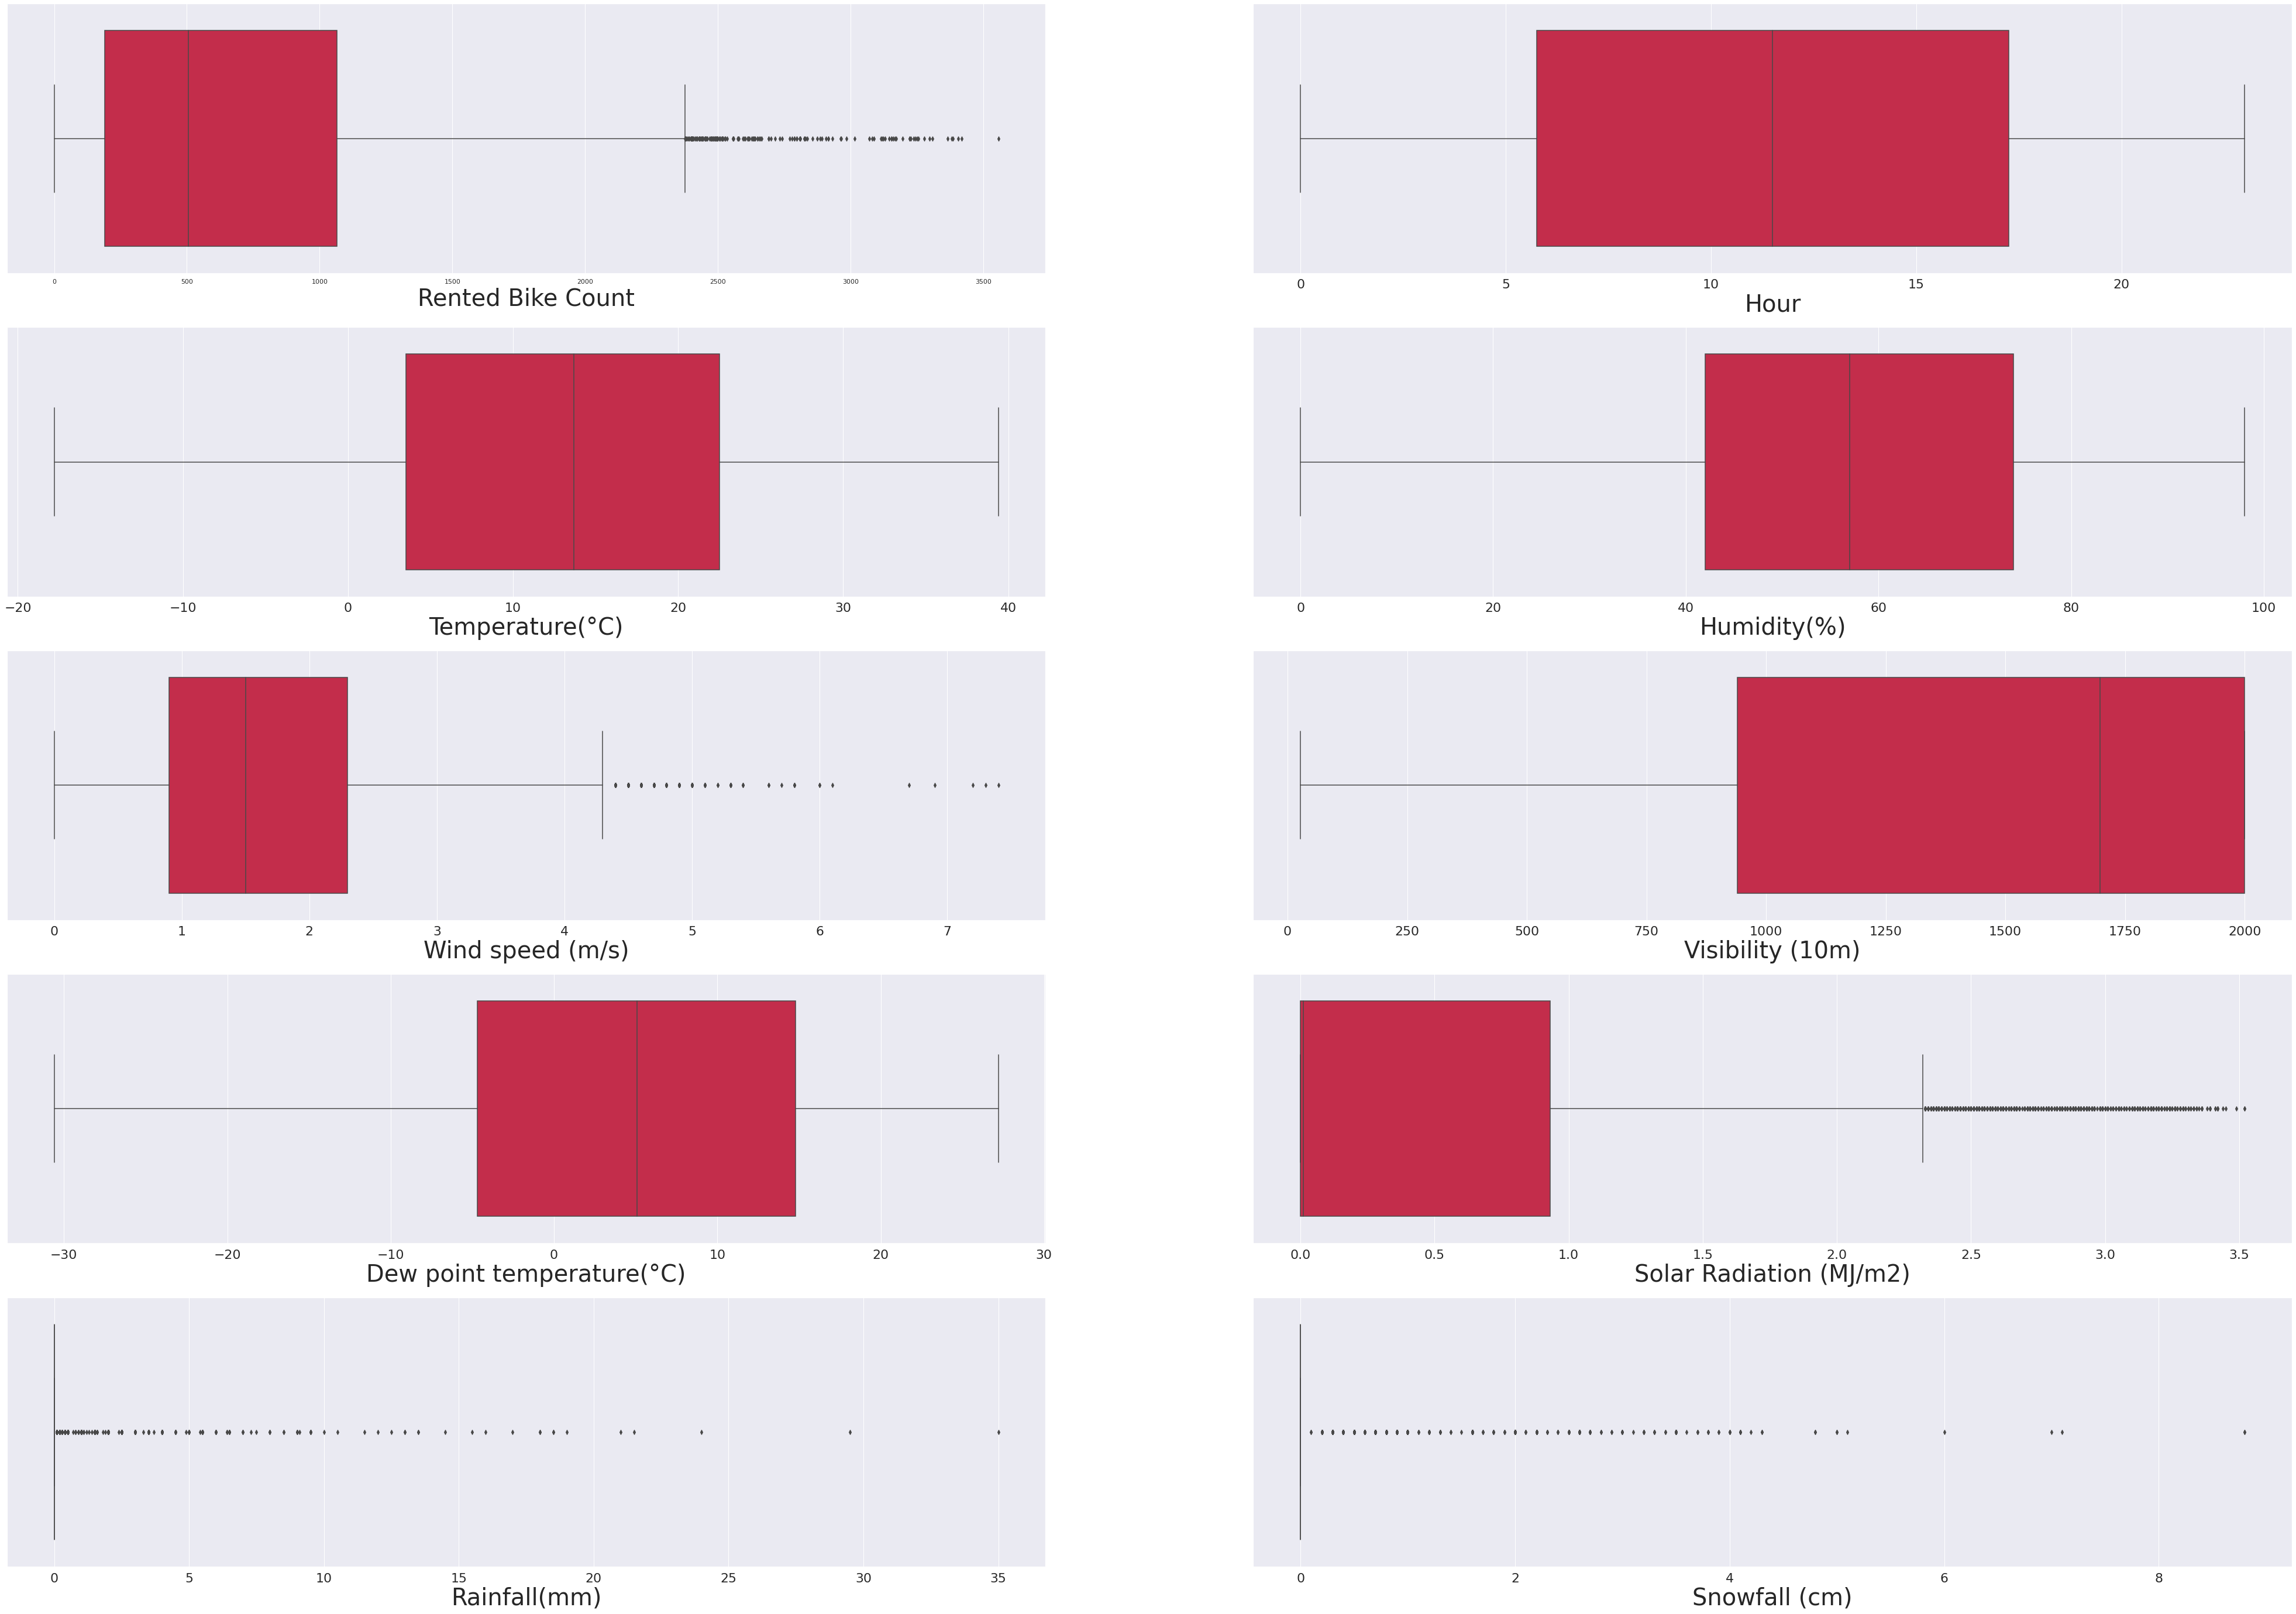

In [93]:
# Box plot to detect outliers
lst_box = numerical_variables
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(10, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.boxplot(df[i[1]],color='crimson')
    plt.xlabel(i[1],fontsize=40)

In [94]:
# Z Score based technique to remove outliers
lst = ['Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)']
for i in lst:
  lower_limit = df[i].mean() - 3*df[i].std()
  print(i+'Lower_limit:',round(lower_limit,2))  
  upper_limit = df[i].mean() + 3*df[i].std()
  print(i+'Upper_limit:',round(upper_limit,2))
  df[i] = np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))

Rented Bike CountLower_limit: -1230.39
Rented Bike CountUpper_limit: 2639.59
Temperature(°C)Lower_limit: -22.95
Temperature(°C)Upper_limit: 48.72
Humidity(%)Lower_limit: -2.86
Humidity(%)Upper_limit: 119.31
Wind speed (m/s)Lower_limit: -1.38
Wind speed (m/s)Upper_limit: 4.83
Visibility (10m)Lower_limit: -388.07
Visibility (10m)Upper_limit: 3261.72
Dew point temperature(°C)Lower_limit: -35.11
Dew point temperature(°C)Upper_limit: 43.25
Solar Radiation (MJ/m2)Lower_limit: -2.04
Solar Radiation (MJ/m2)Upper_limit: 3.18


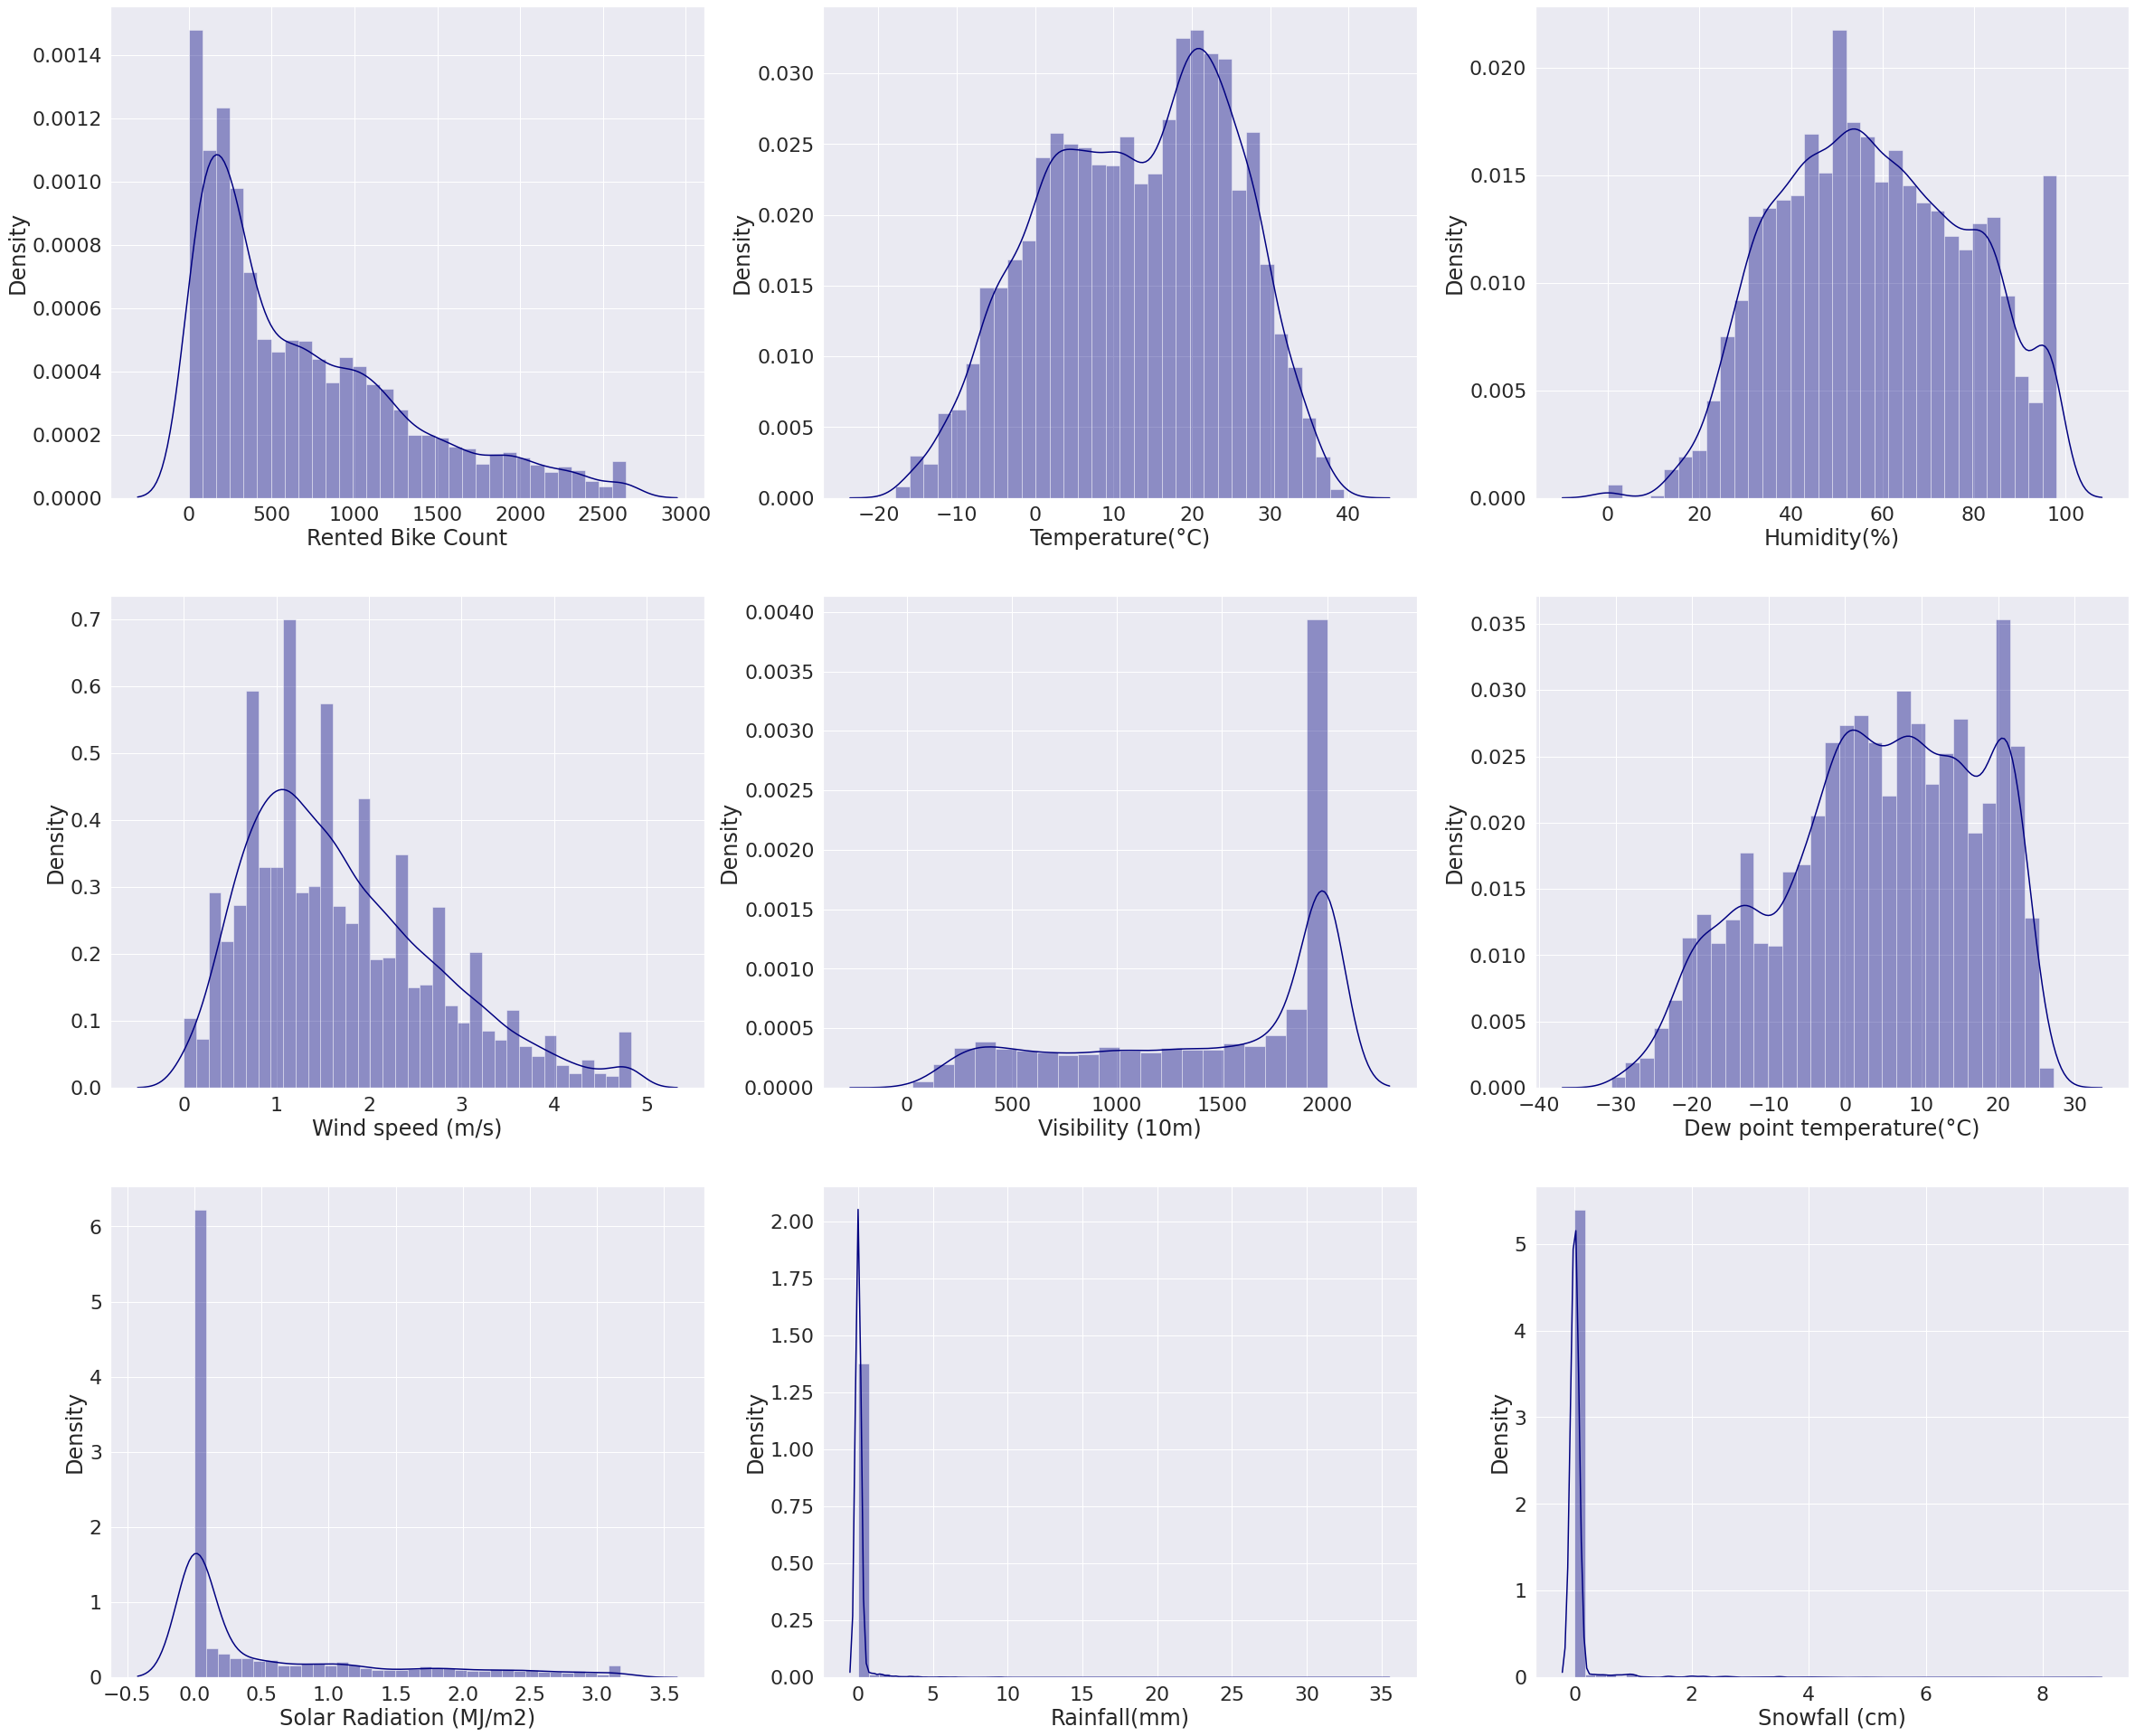

In [95]:
# Distribution plot for numerical variables
lst_dist = numerical_variables
numerical_variables.remove('Hour')
plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_dist):
  sns.set(font_scale = 2)
  plt.subplot(6, 3,i[0]+1)
  sns.distplot(df[i[1]],color = 'navy')

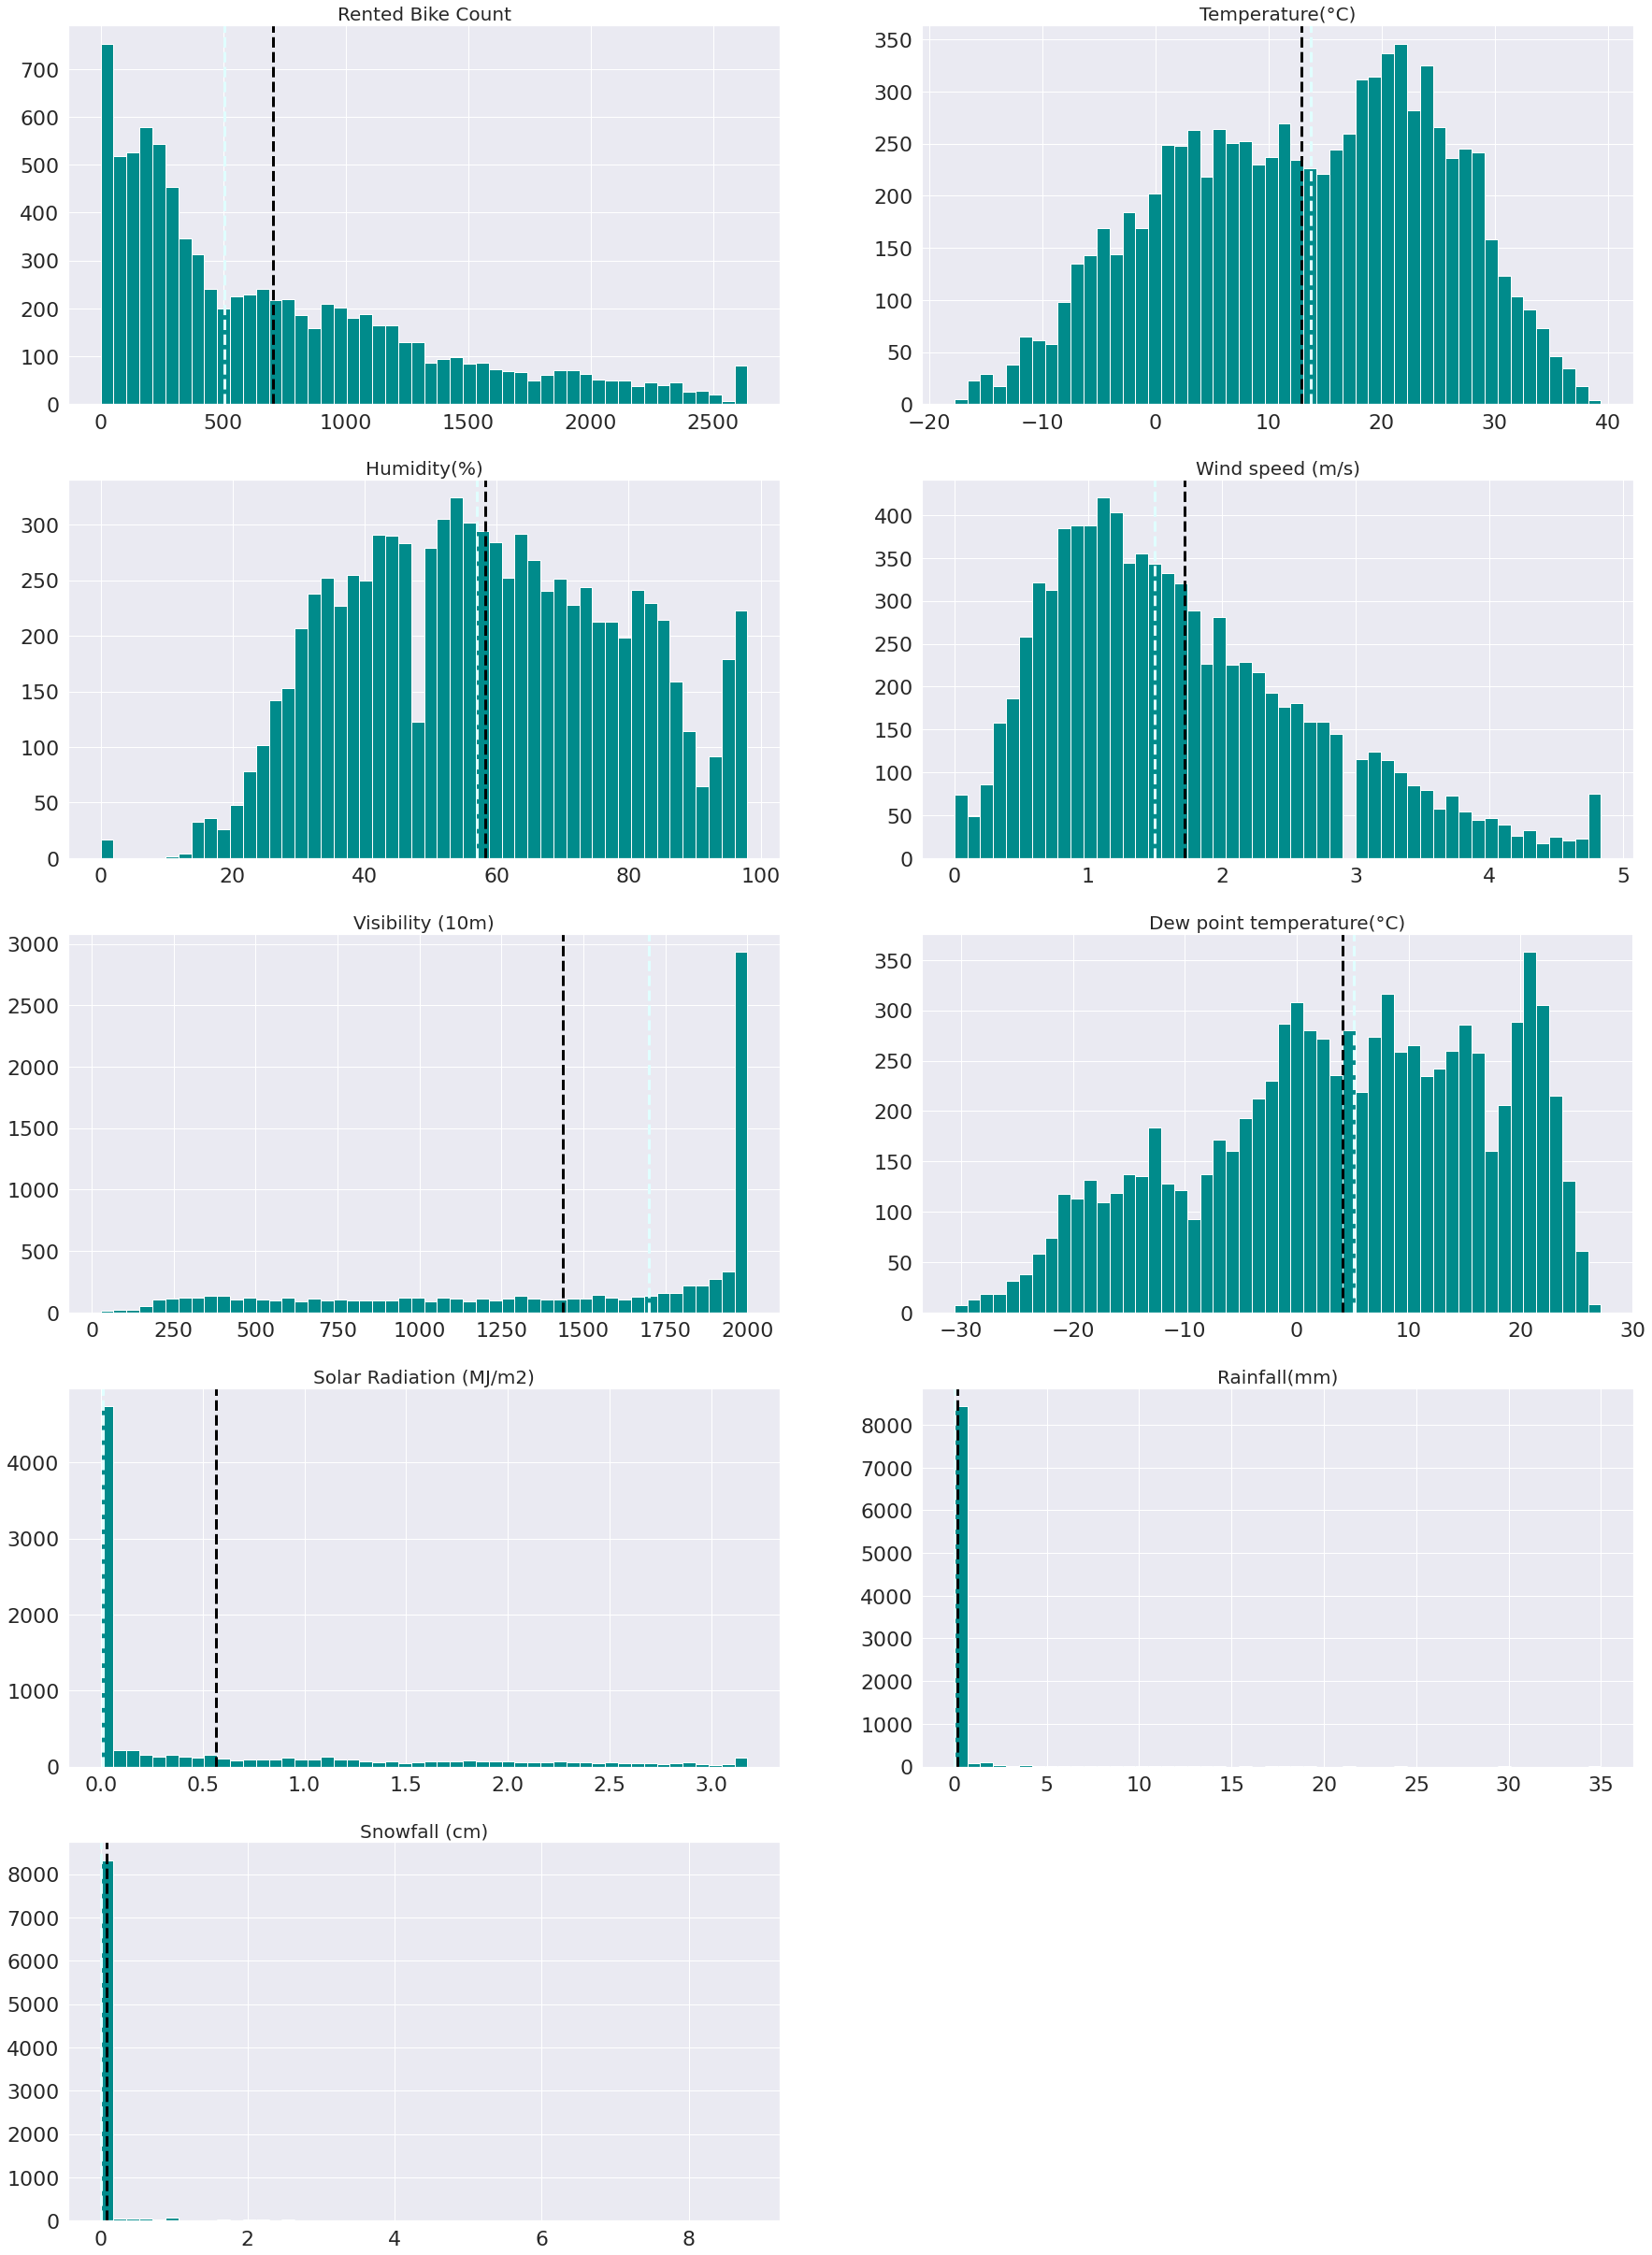

In [96]:
# Calculating mean and median

# numerical_variables.remove('Hour')
plt.figure(figsize = (30,70))

for i in enumerate(numerical_variables):
  plt.subplot(8, 2,i[0]+1)
  feature = df[i[1]]
  feature.hist(bins=50,color = 'darkcyan')
  plt.axvline(feature.mean(),color = 'black',linestyle='dashed', linewidth=3)
  plt.axvline(feature.median(),color = 'lightcyan',linestyle='dashed',linewidth=3)
  plt.title(i[1],fontsize = 20)

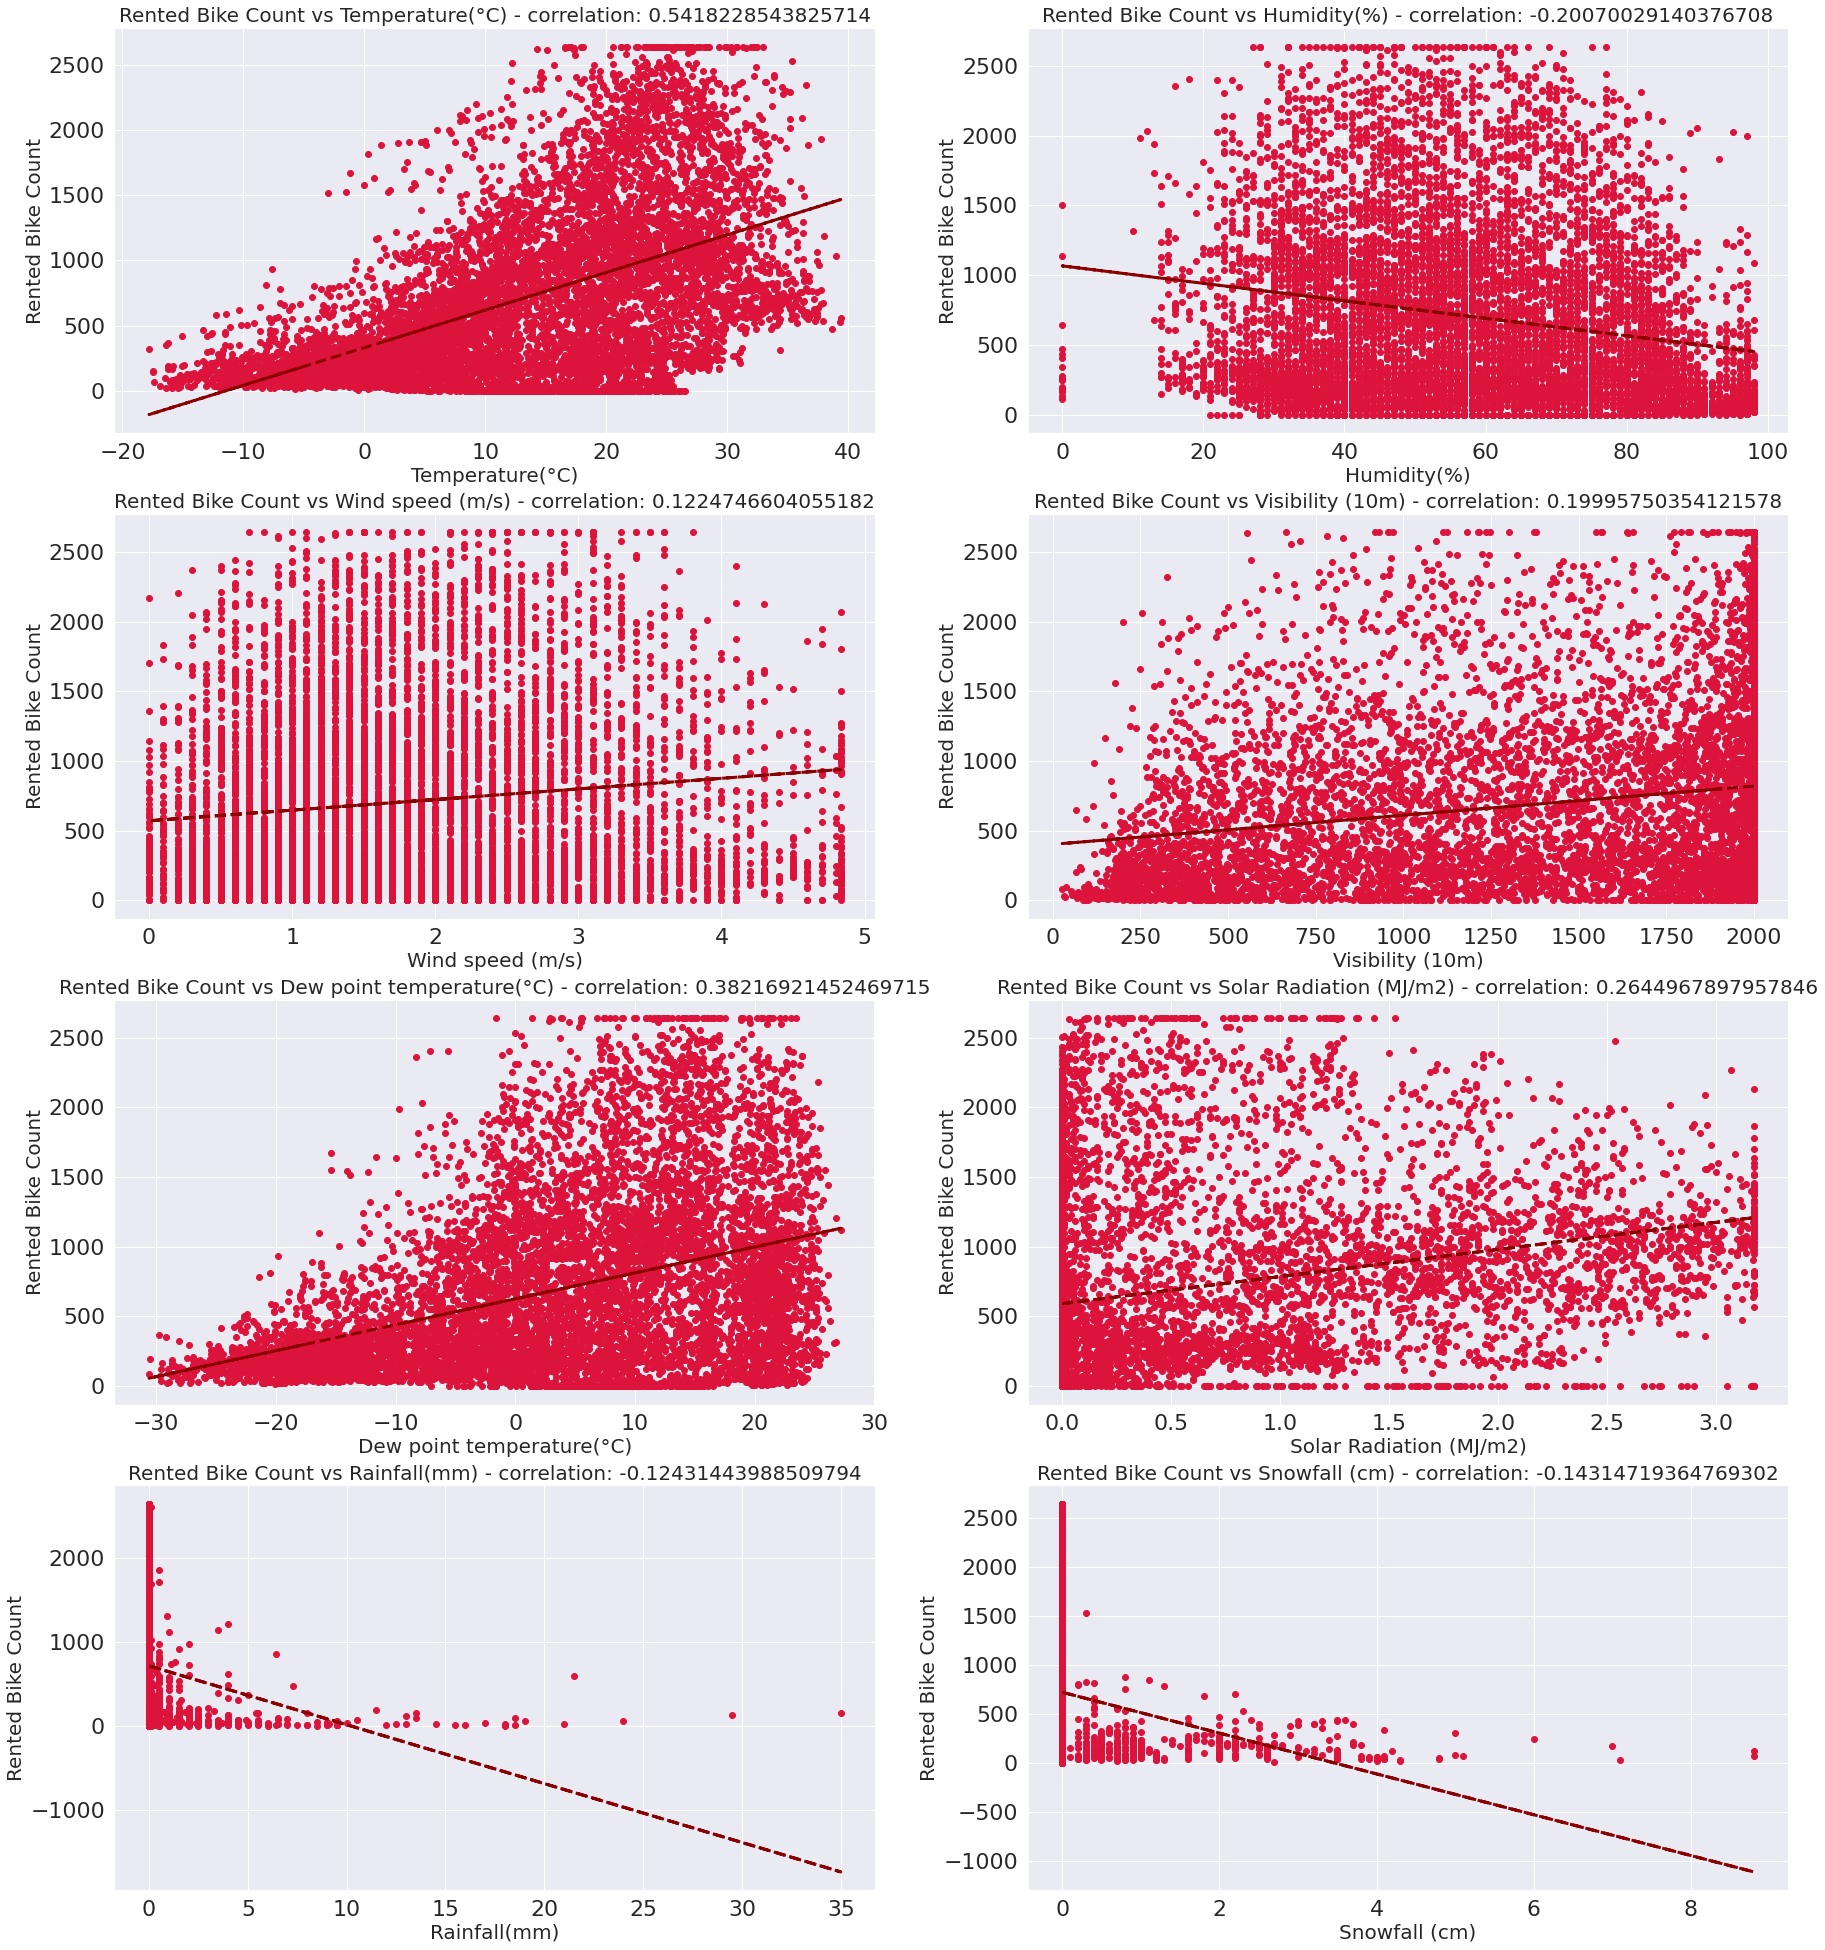

In [97]:
# Plotting scatter plot and correlation

plt.figure(figsize = (30,70))

numerical_variables.remove('Rented Bike Count')
for i in enumerate(numerical_variables):
  plt.subplot(8, 2,i[0]+1)
  feature = df[i[1]]
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label,color = 'crimson',alpha = 1)
  plt.xlabel(i[1],fontsize = 20)
  plt.ylabel('Rented Bike Count',fontsize = 20)
  plt.title('Rented Bike Count' + ' vs '  + i[1] + ' - correlation: ' + str(correlation),fontsize = 20)
  z = np.polyfit(df[i[1]], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[i[1]])
  plt.plot(df[i[1]], y_hat, "r--", lw=3,color = 'darkred')

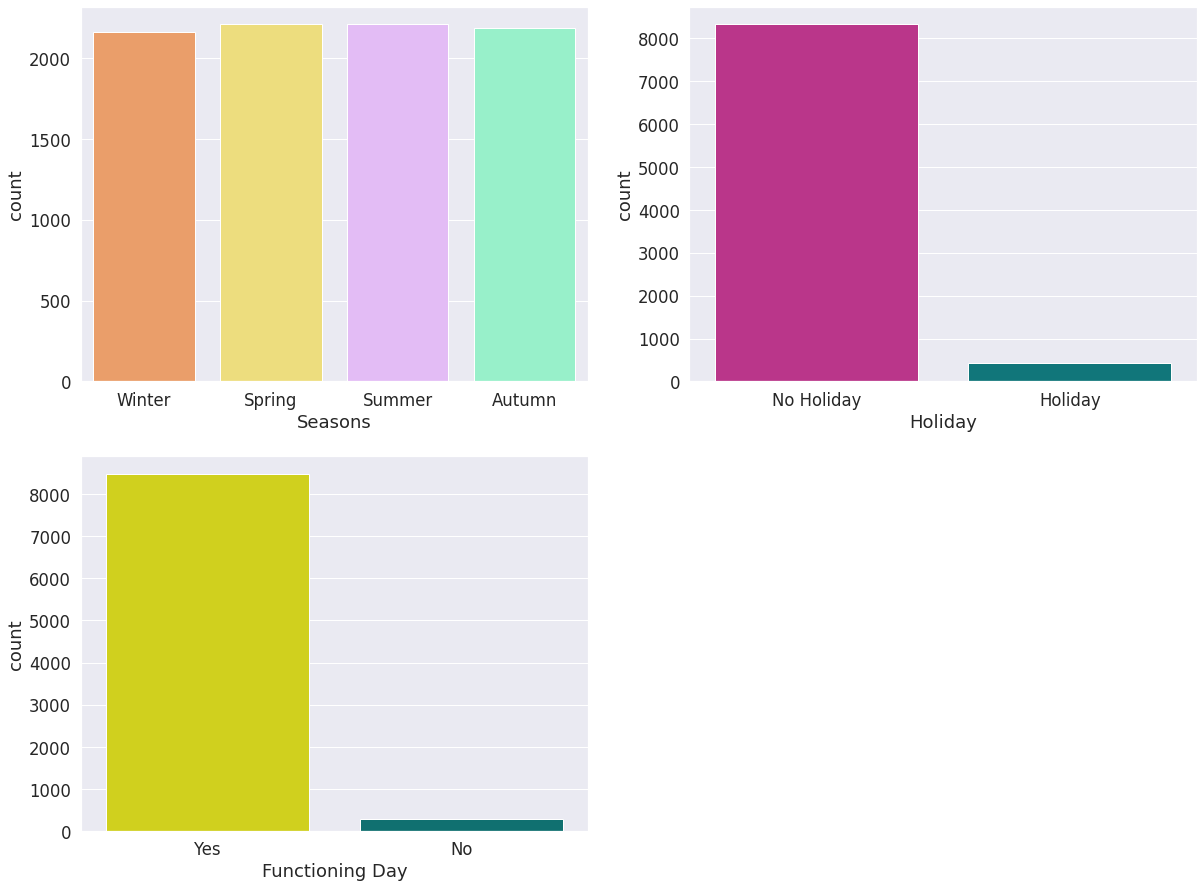

In [98]:
# Count Plot
categorical_var_count = ['Seasons', 'Holiday', 'Functioning Day']
plt.figure(figsize = (20,40))
sns.set_theme()
color = [['#ff9a55','#ffea6c','#e7b2ff','#89ffcc'],['#D02090','#00868B'],['#EEEE00','#008080']]
for i in enumerate(categorical_var_count):
  sns.set(font_scale = 1.5)
  plt.subplot(5, 2,i[0]+1)
  sns.countplot(data = df, x = df[i[1]],palette= color[i[0]])

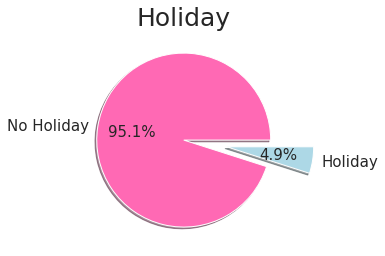

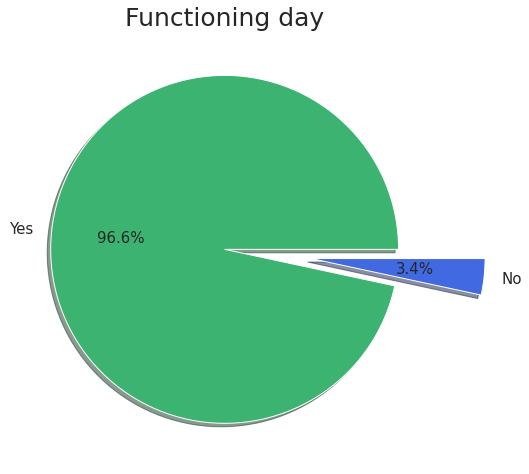

In [99]:
# Pie chart
valuesh= df['Holiday'].value_counts().tolist()
labelh = df['Holiday'].value_counts().index.tolist()
plt.pie(valuesh ,labels=labelh , radius=1,explode = [0,0.5],colors=['hotpink','lightblue'] ,textprops={'fontsize': 15}, autopct='%0.1f%%',shadow=True)
plt.rcParams['figure.figsize']=(9,8)
plt.title('Holiday',fontsize = 25)
plt.show()

valuesf= df['Functioning Day'].value_counts().tolist()
labelf = df['Functioning Day'].value_counts().index.tolist()
plt.pie(valuesf ,labels=labelf , radius=1,explode = [0,0.5],colors=['mediumseagreen','royalblue'] ,textprops={'fontsize': 15}, autopct='%0.1f%%',shadow=True)
plt.rcParams['figure.figsize']=(9,8)
plt.title('Functioning day',fontsize = 25)
plt.show()

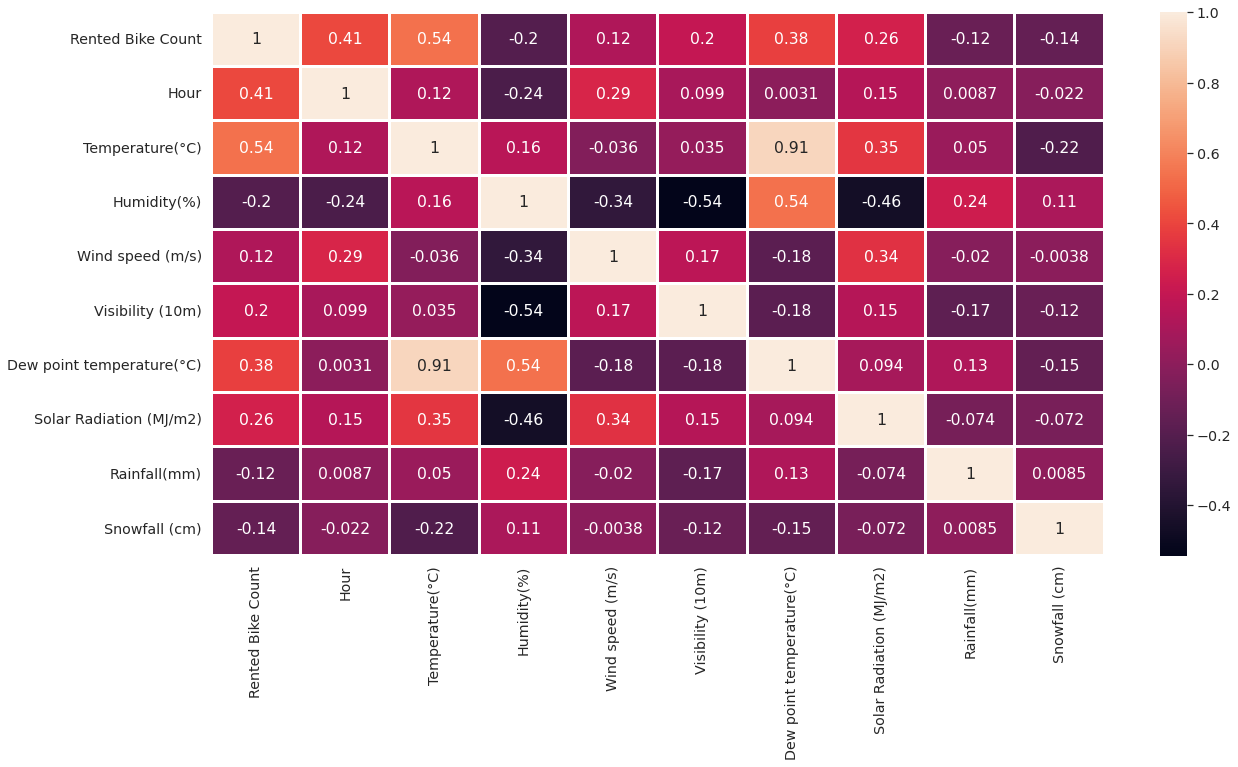

In [100]:
# Multicolinearity

plt.figure(figsize = (20, 10))
df_co_relation = df.corr()
sns.set(font_scale = 1.3)
sns.heatmap(df_co_relation, annot = True, linewidths = 2)
plt.show()

In [101]:
# There exists a high multicolinearity between Temperature and Dew point Temperature
# Lets create a feature new feature Temperature which comprises the addition of temperature and dew point temperature
df['Temperature'] = df['Temperature(°C)'] + df['Dew point temperature(°C)']
df.drop('Temperature(°C)',axis = 1,inplace = True)
df.drop('Dew point temperature(°C)',axis = 1,inplace = True)

In [102]:
# Varinace Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [103]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Rented Bike Count']]])

,variables,VIF
0,Hour,3.877343
1,Humidity(%),5.118281
2,Wind speed (m/s),4.767596
3,Visibility (10m),4.743852
4,Solar Radiation (MJ/m2),2.073688
5,Rainfall(mm),1.079532
6,Snowfall (cm),1.117344
7,Temperature,2.183298


In [129]:
# One hot encoding
data = pd.get_dummies(df,columns = ['Hour','Seasons','Holiday','Functioning Day'])
data.drop(['Hour_0','Seasons_Autumn','Holiday_Holiday','Functioning Day_No'],axis = 1,inplace = True)
data.head()

,Rented Bike Count,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Temperature,Hour_1,Hour_2,...,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254.0,37.0,2.2,2000.0,0.0,0.0,0.0,-22.8,0,0,...,0,0,0,0,0,0,0,1,1,1
1,204.0,38.0,0.8,2000.0,0.0,0.0,0.0,-23.1,1,0,...,0,0,0,0,0,0,0,1,1,1
2,173.0,39.0,1.0,2000.0,0.0,0.0,0.0,-23.7,0,1,...,0,0,0,0,0,0,0,1,1,1
3,107.0,40.0,0.9,2000.0,0.0,0.0,0.0,-23.8,0,0,...,0,0,0,0,0,0,0,1,1,1
4,78.0,36.0,2.3,2000.0,0.0,0.0,0.0,-24.6,0,0,...,0,0,0,0,0,0,0,1,1,1


In [130]:
# Columns
data.columns

Index(['Rented Bike Count', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Temperature', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes'],
      dtype='object')

In [133]:
independent_variables = data.columns.tolist()
independent_variables.remove('Rented Bike Count')
dependent_variable = ['Rented Bike Count']
print(independent_variables)
print(dependent_variable)

['Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Temperature', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes']
['Rented Bike Count']


In [134]:
X = data[independent_variables].values
y = data[dependent_variable].values

In [135]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [136]:
# Transforming data

# Normailzation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [137]:
# Linear Regression
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [138]:
print(regressor.intercept_)
print(regressor.coef_)
# y train preds
y_pred_train = regressor.predict(X_train)
y_pred_train

# Predicting the Test set results
y_pred_test = regressor.predict(X_test)
y_pred_test

[-441.24404535]
[[ -890.0058664      7.63293331    30.71552117   266.59131773
  -1980.46537048   209.29863385  1271.76117573   -95.69420575
   -215.33227703  -288.53376361  -354.01628831  -341.95078643
   -165.04767131   120.77442012   455.50383593    24.77322486
   -210.44242622  -230.76345472  -187.43909261  -199.18923168
   -183.08541665   -92.24810217    43.3892053    306.67184264
    719.81392246   507.14834646   441.67947132   429.4461371
    336.39726245   101.61535635  -147.5066307   -145.64954506
   -358.31099364   123.41923854   905.01276401]]


array([[ 258.71433251],
       [ 698.19774777],
       [ 537.53390413],
       ...,
       [ 436.21239828],
       [1120.83186959],
       [ 726.13968023]])

In [139]:
print('Mean Squared Error:',mean_squared_error(y_test, y_pred_test))
print('R2 score train:',r2_score(y_train, y_pred_train)*100)
print('R2 score test:',r2_score(y_test, y_pred_test)*100)

Mean Squared Error: 135321.67895391132
R2 score train: 66.54374967353617
R2 score test: 66.682676809775
